#Loan Delinquency Prediction
#Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions.
 

#Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.

 

#Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)

#Hypothesis

#Debt-to-income-ratio : Applicants with high debt-to-income ratio has more chances of deliquency
#m1 to m12- Applicants with low deliquency in previous 12 months have low chances of deliquency in next

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings 
warnings.filterwarnings("ignore")

In [88]:
train=pd.read_csv("C:/Users/sandeep kumar/train.csv") 
test=pd.read_csv("C:/Users/sandeep kumar/test.csv")

In [3]:
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

#we have 28 independent variable and a target variable ie., m13 in train dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

636

In [7]:
train['m13'].value_counts(normalize=True)

0    0.99452
1    0.00548
Name: m13, dtype: float64

#0.548 % is loan delinquecy rate training data

#histogram for loan delinquecy in training data

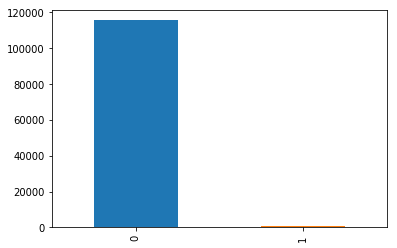

In [8]:
train['m13'].value_counts().plot.bar()

#histograms of source , loan_purpose  and insurance type 

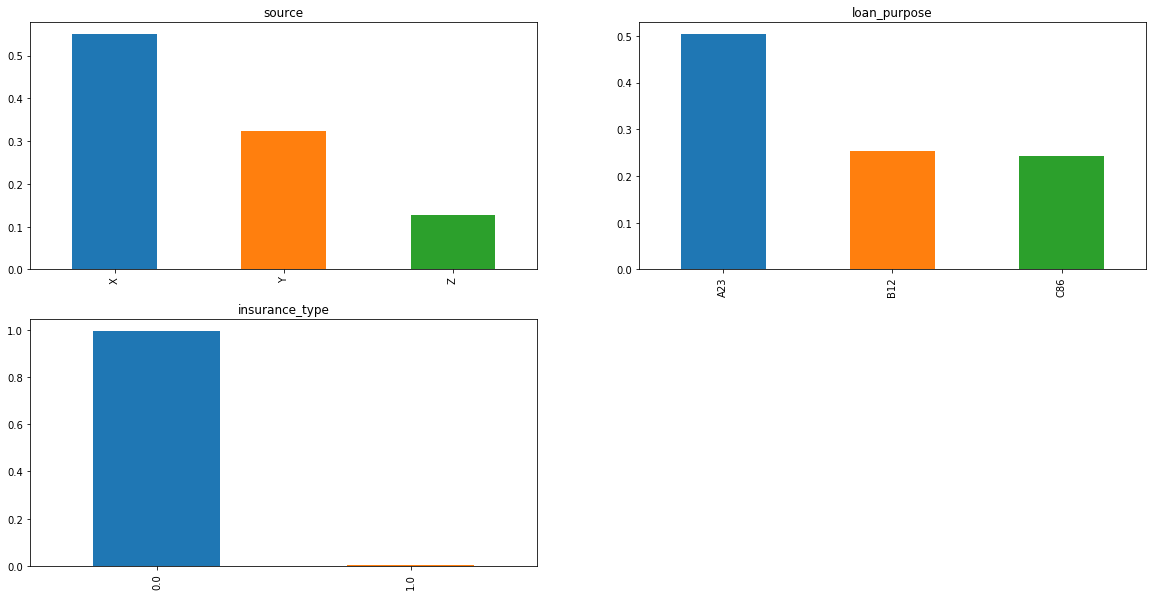

In [9]:
plt.figure(1)
plt.subplot(221)
train['source'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'source') 
plt.subplot(222) 
train['loan_purpose'].value_counts(normalize=True).plot.bar(title= 'loan_purpose') 
plt.subplot(223) 
train['insurance_type'].value_counts(normalize=True).plot.bar(title= 'insurance_type') 
plt.show()




In [10]:
train['source'].value_counts(normalize=True)

X    0.550225
Y    0.323580
Z    0.126196
Name: source, dtype: float64

In [11]:
train['loan_purpose'].value_counts(normalize=True)

A23    0.503731
B12    0.253175
C86    0.243094
Name: loan_purpose, dtype: float64

In [12]:
train['insurance_type'].value_counts(normalize=True)

0.0    0.996743
1.0    0.003257
Name: insurance_type, dtype: float64

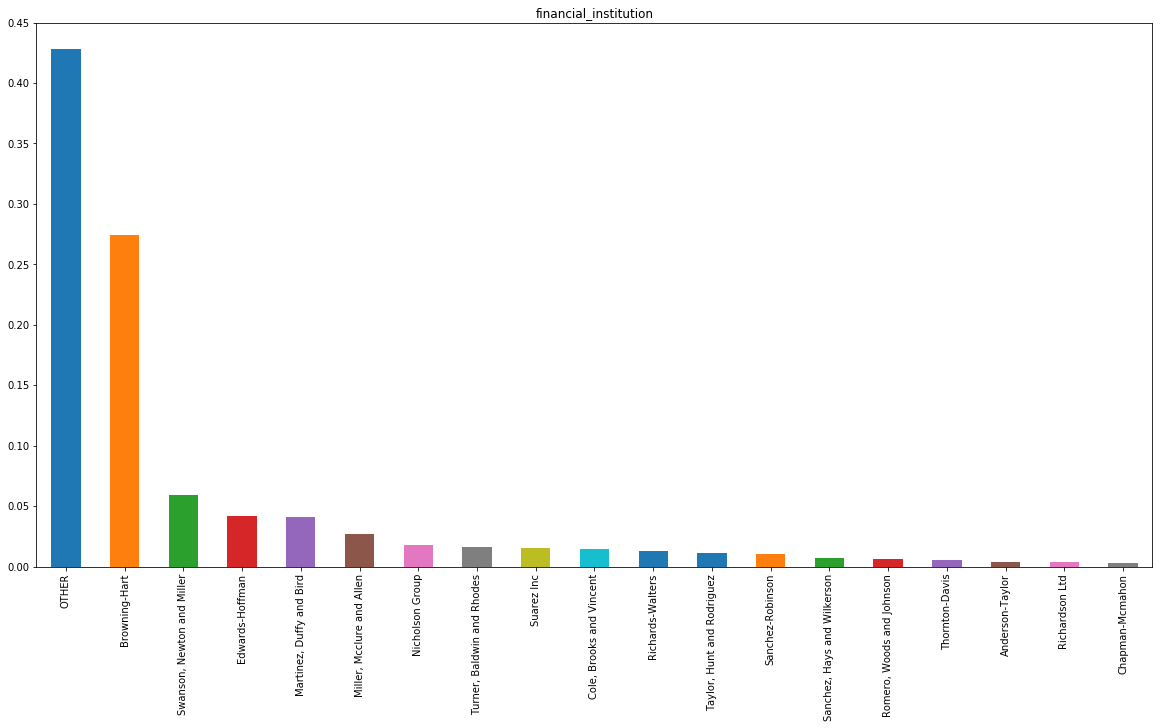

In [13]:

train['financial_institution'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'financial_institution')
plt.show()

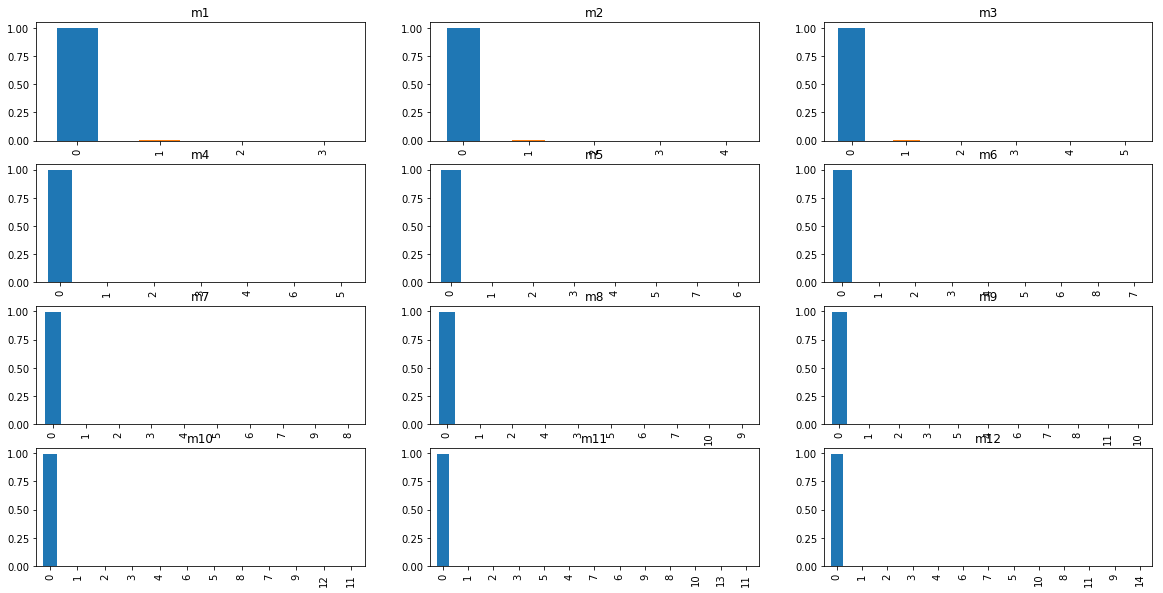

In [14]:
plt.figure(1)
plt.subplot(431)
train['m1'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm1') 
plt.subplot(432)
train['m2'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm2') 
plt.subplot(433)
train['m3'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm3') 
plt.subplot(434)
train['m4'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm4') 
plt.subplot(435)
train['m5'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm5') 
plt.subplot(436)
train['m6'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm6') 
plt.subplot(437)
train['m7'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm7') 
plt.subplot(438)
train['m8'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm8') 
plt.subplot(439)
train['m9'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm9') 
plt.subplot(4,3,10)
train['m10'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm10') 
plt.subplot(4,3,11)
train['m11'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm11') 
plt.subplot(4,3,12)
train['m12'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'm12') 
plt.show()

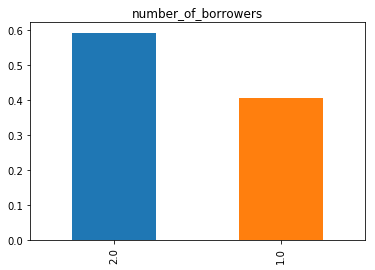

2.0    0.593186
1.0    0.406814
Name: number_of_borrowers, dtype: float64

In [15]:
train['number_of_borrowers'].value_counts(normalize=True).plot.bar( title= 'number_of_borrowers') 
plt.show()
train['number_of_borrowers'].value_counts(normalize=True)

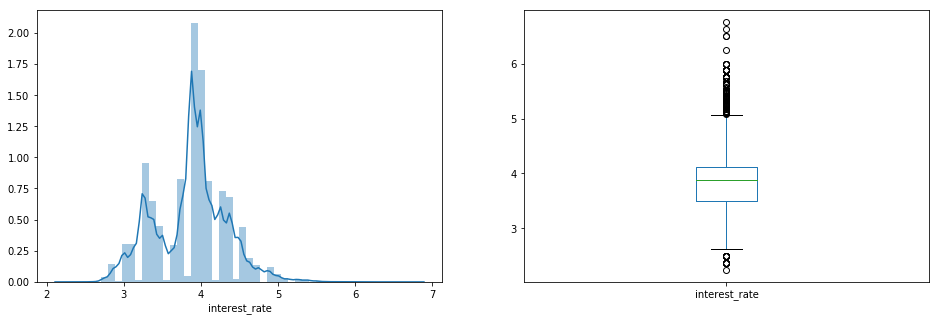

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['interest_rate']); 
plt.subplot(122) 
train['interest_rate'].plot.box(figsize=(16,5)) 
plt.show()

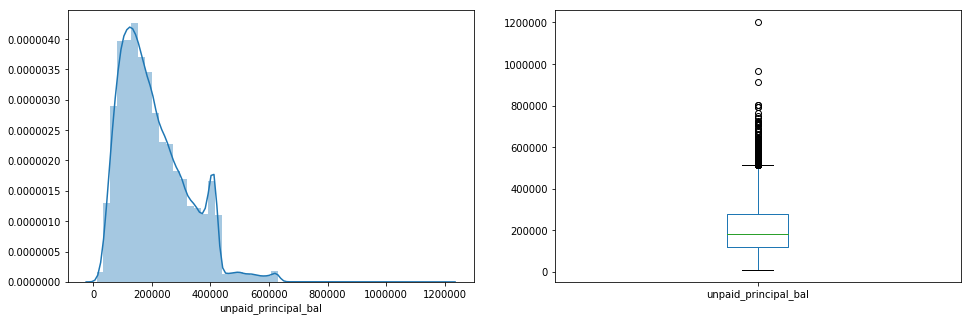

In [17]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['unpaid_principal_bal']); 
plt.subplot(122) 
train['unpaid_principal_bal'].plot.box(figsize=(16,5)) 
plt.show()

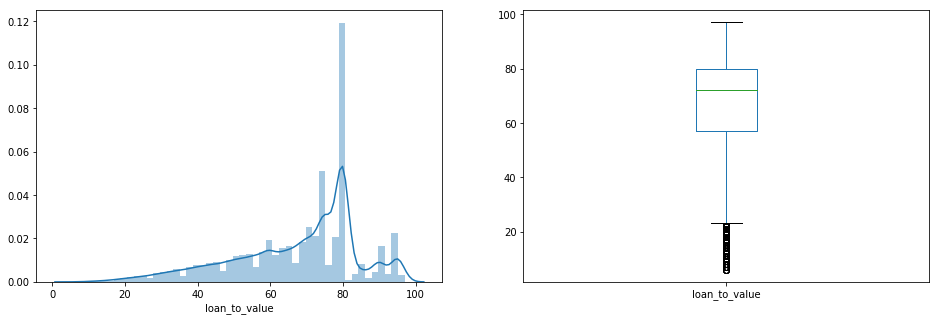

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['loan_to_value']); 
plt.subplot(122) 
train['loan_to_value'].plot.box(figsize=(16,5)) 
plt.show()

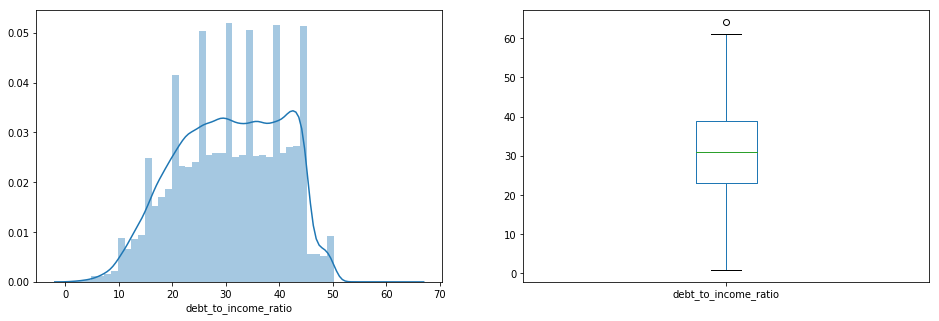

In [19]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['debt_to_income_ratio']); 
plt.subplot(122) 
train['debt_to_income_ratio'].plot.box(figsize=(16,5)) 
plt.show()

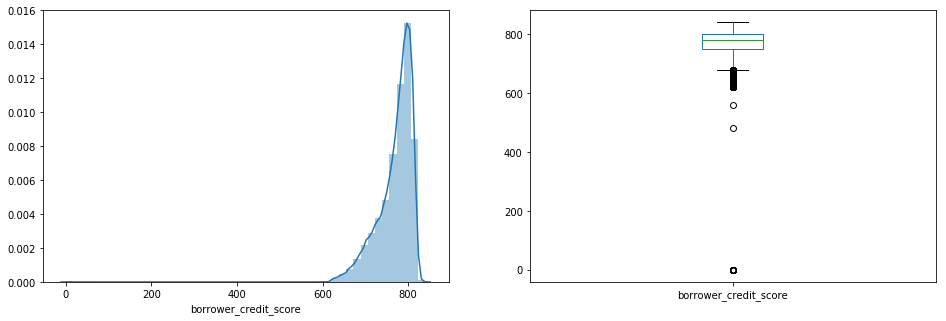

In [20]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['borrower_credit_score']); 
plt.subplot(122) 
train['borrower_credit_score'].plot.box(figsize=(16,5)) 
plt.show()

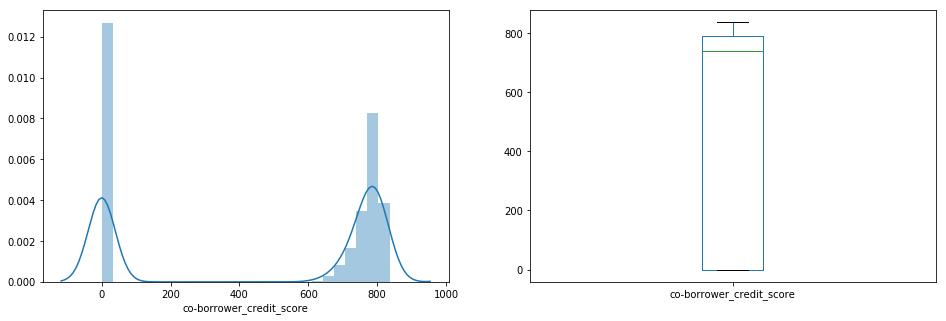

In [21]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['co-borrower_credit_score']); 
plt.subplot(122) 
train['co-borrower_credit_score'].plot.box(figsize=(16,5)) 
plt.show()

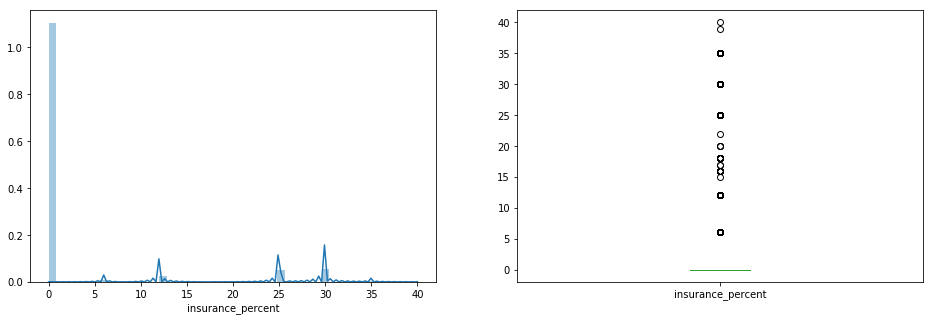

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['insurance_percent']); 
plt.subplot(122) 
train['insurance_percent'].plot.box(figsize=(16,5)) 
plt.show()

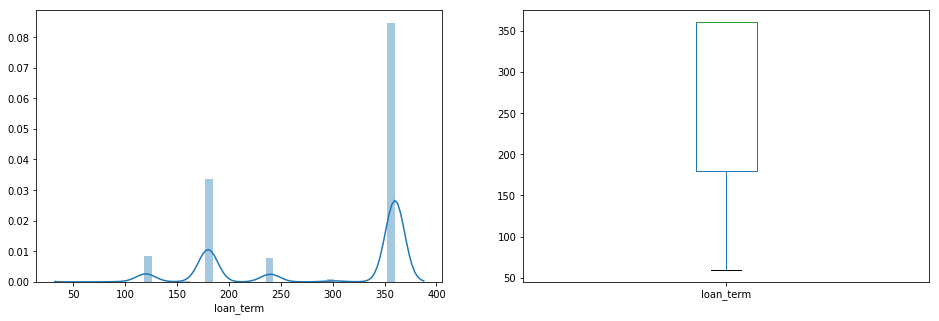

In [23]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['loan_term']); 
plt.subplot(122) 
train['loan_term'].plot.box(figsize=(16,5)) 
plt.show()

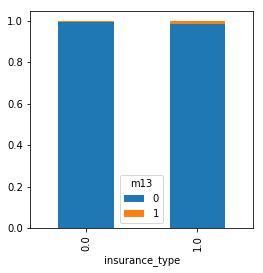

In [24]:
insurance_type=pd.crosstab(train['insurance_type'],train['m13']) 
insurance_type.div(insurance_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

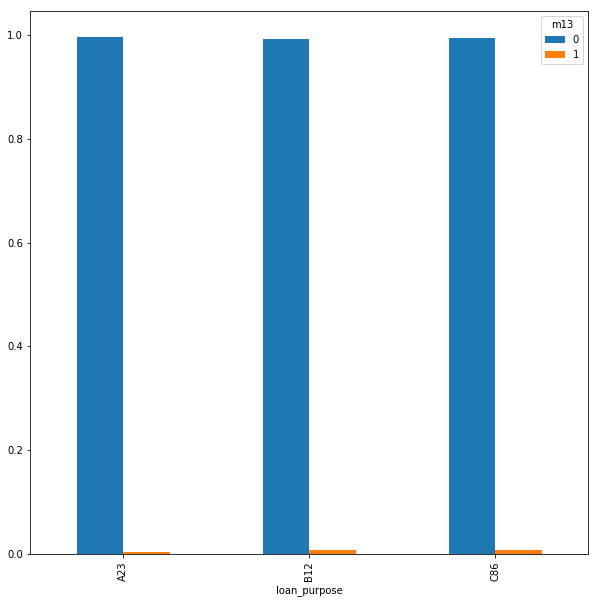

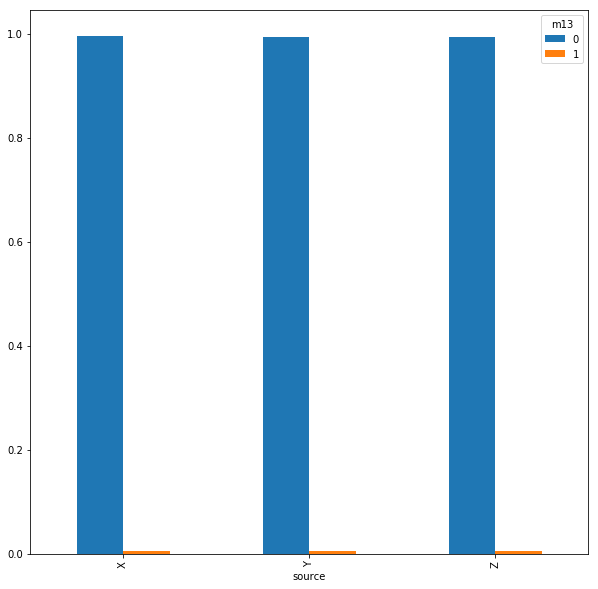

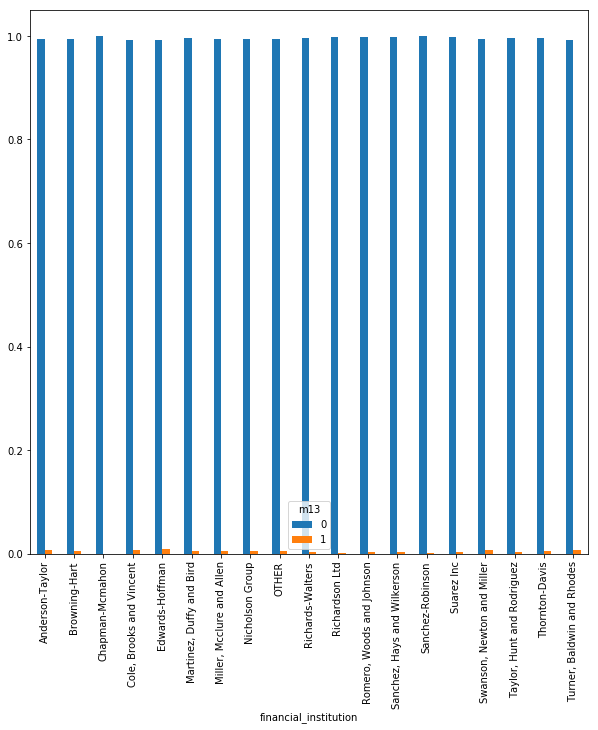

In [25]:
loan_purpose=pd.crosstab(train['loan_purpose'],train['m13']) 
source=pd.crosstab(train['source'],train['m13']) 
financial_institution=pd.crosstab(train['financial_institution'],train['m13']) 

loan_purpose.div(loan_purpose.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,10))
source.div(source.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(10,10) )
financial_institution.div(financial_institution.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,10))
plt.show()


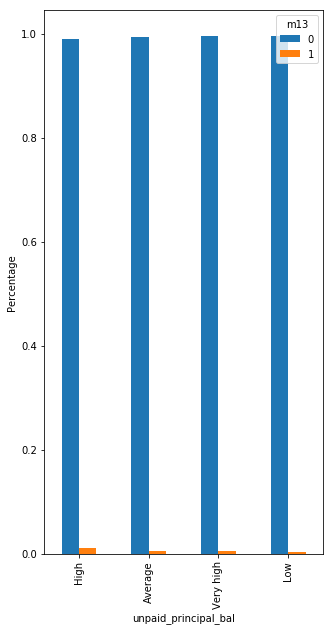

In [26]:
bins=[0,50000,200000,300000,1200000]
group=['Low','Average','High', 'Very high'] 
train['unpaid_principal_bal_bin']=pd.cut(train['unpaid_principal_bal'],bins,labels=group)
unpaid_principal_bal=pd.crosstab(train['unpaid_principal_bal_bin'],train['m13'])
unpaid_principal_bal.div(unpaid_principal_bal.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(5,10))
plt.xlabel('unpaid_principal_bal') 

P = plt.ylabel('Percentage')

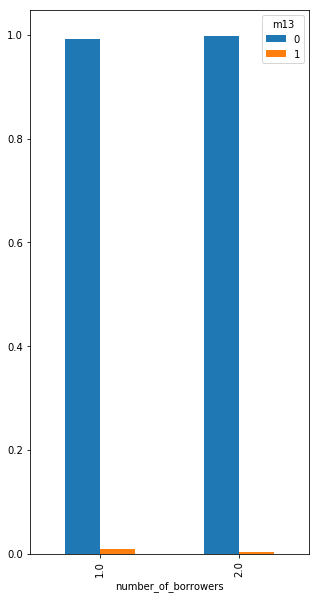

In [27]:
number_of_borrowers=pd.crosstab(train['number_of_borrowers'],train['m13'])
number_of_borrowers.div(number_of_borrowers.sum(1), axis=0).plot(kind="bar", figsize=(5,10))
plt.show()

In [28]:
train=train.drop(['unpaid_principal_bal_bin'],axis=1)

In [ ]:
#calculating correlation matrix and plotting heatmap

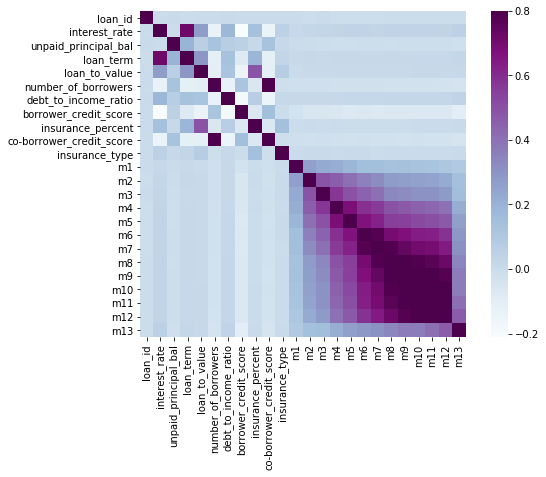

In [29]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [30]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [31]:
train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [32]:
test.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

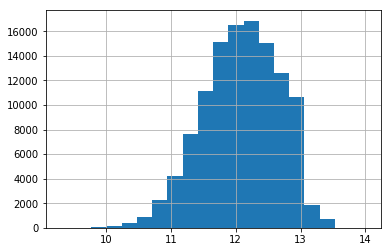

In [89]:
train['unpaid_principal_bal_log'] = np.log(train['unpaid_principal_bal']) 
train['unpaid_principal_bal_log'].hist(bins=20)
test['unpaid_principal_bal_log'] = np.log(test['unpaid_principal_bal'])

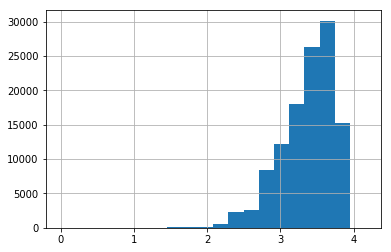

In [90]:
train['debt_to_income_ratio_log']=np.log(train['debt_to_income_ratio'])
train['debt_to_income_ratio_log'].hist(bins=20)
test['debt_to_income_ratio_log']=np.log(test['debt_to_income_ratio'])

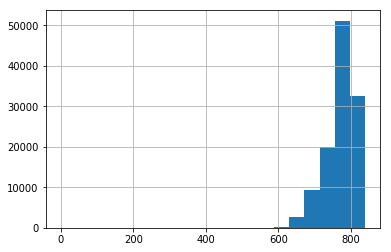

In [35]:
train['borrower_credit_score'].hist(bins=20)

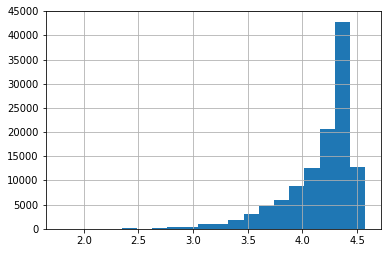

In [91]:
train['loan_to_value_log'] = np.log(train['loan_to_value']) 
train['loan_to_value_log'].hist(bins=20)
test['loan_to_value_log'] = np.log(test['loan_to_value'])

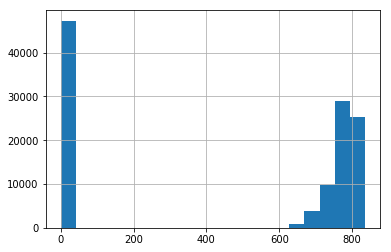

In [37]:
train['co-borrower_credit_score'].hist(bins=20)

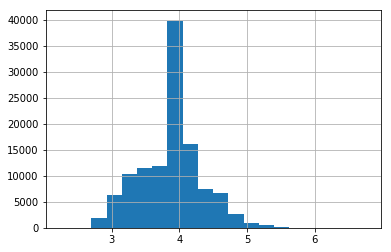

In [38]:
train['interest_rate'].hist(bins=20)

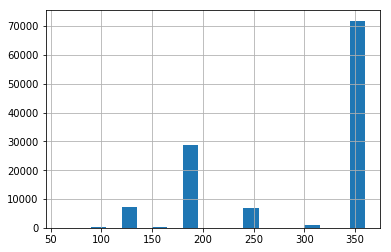

In [39]:
train['loan_term'].hist(bins=20)

#removing unwanted data

In [92]:
train=train.drop('loan_id',axis=1)
test=test.drop('loan_id',axis=1)



In [67]:
train.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'unpaid_principal_bal_log', 'debt_to_income_ratio_log',
       'loan_to_value_log'],
      dtype='object')

In [93]:
train=train.drop('financial_institution',axis=1)
test=test.drop('financial_institution',axis=1)

In [94]:
train=train.drop('debt_to_income_ratio',axis=1)
test=test.drop('debt_to_income_ratio',axis=1)

In [95]:
train=train.drop('source',axis=1)
test=test.drop('source',axis=1)
train=train.drop('loan_purpose',axis=1)
test=test.drop('loan_purpose',axis=1)

In [96]:

train=train.drop('unpaid_principal_bal',axis=1)
test=test.drop('unpaid_principal_bal',axis=1)
train=train.drop('loan_to_value',axis=1)
test=test.drop('loan_to_value',axis=1)
train.columns

Index(['interest_rate', 'loan_term', 'origination_date', 'first_payment_date',
       'number_of_borrowers', 'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13',
       'unpaid_principal_bal_log', 'debt_to_income_ratio_log',
       'loan_to_value_log'],
      dtype='object')

In [97]:
train=train.drop('origination_date',axis=1)
test=test.drop('origination_date',axis=1)
train=train.drop('first_payment_date',axis=1)
test=test.drop('first_payment_date',axis=1)

In [98]:

train=train.drop('insurance_type',axis=1)
test=test.drop('insurance_type',axis=1)
train.columns

Index(['interest_rate', 'loan_term', 'number_of_borrowers',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'unpaid_principal_bal_log',
       'debt_to_income_ratio_log', 'loan_to_value_log'],
      dtype='object')

#seperating feature data and target value

In [103]:
X=train.drop('m13',axis=1)
y=train.m13


#getting dummy variables for categorical data

In [104]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

#training a basic logistic regression model

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [80]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
pred_cv = model.predict(x_cv)

In [82]:
accuracy_score(y_cv,pred_cv)

0.9956344419553105

In [53]:
pred_test = model.predict(test)

In [54]:
#submission=pd.read_csv("C:/Users/sandeep kumar/sample_submission.csv")

In [55]:
submission=pd.DataFrame()
submission['loan_id']=test_original['loan_id']
submission['m13']=pred_test 


In [56]:
pd.DataFrame(submission, columns=['loan_id','m13']).to_csv('solution.csv',index=False)

In [57]:
submission.columns


Index(['loan_id', 'm13'], dtype='object')

#finding best parameters of logistic regression

In [58]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'C': np.logspace(-3,3,7), 'penalty': ["l1","l2"]}
grid_search=GridSearchCV(LogisticRegression(),paramgrid,cv=10)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
grid_search.best_estimator_

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
X.columns


Index(['interest_rate', 'loan_term', 'number_of_borrowers',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'm12', 'max_delinquecy', 'total_delinquecy',
       'unpaid_principal_bal_log', 'debt_to_income_ratio_log',
       'loan_to_value_log', 'source_X', 'source_Y', 'source_Z',
       'loan_purpose_A23', 'loan_purpose_B12', 'loan_purpose_C86'],
      dtype='object')

#applying logistic regression with estimated parameters

In [105]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(C=1000.0)     
    model.fit(xtr, ytr)   
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)   
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 10
accuracy_score 0.9962953390195571

2 of kfold 10
accuracy_score 0.9956060997673818

3 of kfold 10
accuracy_score 0.9956918835085301

4 of kfold 10
accuracy_score 0.9952610718593831

5 of kfold 10
accuracy_score 0.9958642081681889

6 of kfold 10
accuracy_score 0.996122695157677

7 of kfold 10
accuracy_score 0.9958638517880224

8 of kfold 10
accuracy_score 0.9962947005601034

9 of kfold 10
accuracy_score 0.9964670400689358

10 of kfold 10
accuracy_score 0.9960361912968548


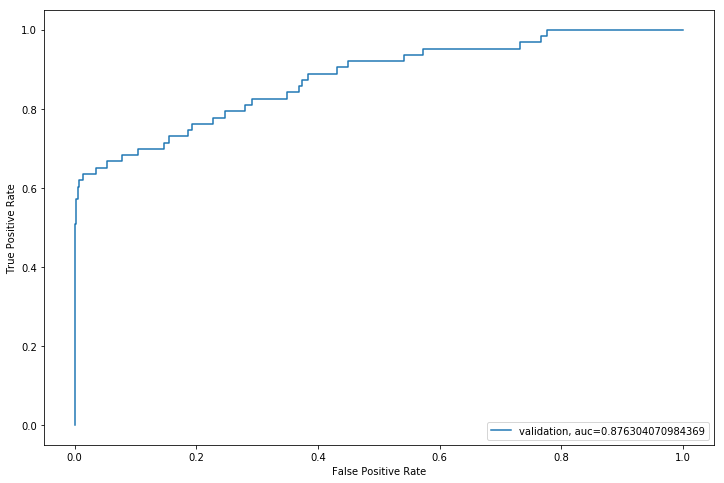

In [106]:
from sklearn import metrics
fpr, tpr,_ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [62]:
submission=pd.DataFrame()
submission['loan_id']=test_original['loan_id']
submission['m13']=pred_test

In [63]:
pd.DataFrame(submission, columns=['loan_id','m13']).to_csv('solution.csv',index=False)

#applying decision tree algorithm

In [64]:
from sklearn import tree
#Let’s fit the decision tree model with 5 folds of cross validation.

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.9923318829965967

2 of kfold 5
accuracy_score 0.99211614682061

3 of kfold 5
accuracy_score 0.9915557278876395

4 of kfold 5
accuracy_score 0.9923743052862867

5 of kfold 5
accuracy_score 0.9924173883072681


In [65]:
submission=pd.DataFrame()
submission['loan_id']=test_original['loan_id']
submission['m13']=pred_test

In [66]:
pd.DataFrame(submission, columns=['loan_id','m13']).to_csv('solution.csv',index=False)

#applying RandomForestClassifier  and calculating results

In [107]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 



1 of kfold 5
accuracy_score 0.9956920690992116

2 of kfold 5
accuracy_score 0.9950025848698949

3 of kfold 5
accuracy_score 0.9957778639438197

4 of kfold 5
accuracy_score 0.9957778639438197

5 of kfold 5
accuracy_score 0.9961225281116712


In [178]:
from sklearn.ensemble import GradientBoostingClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = GradientBoostingClassifier(learning_rate=0.02,random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.9960367035712747

2 of kfold 5
accuracy_score 0.9953472341892124

3 of kfold 5
accuracy_score 0.9960363620697084

4 of kfold 5
accuracy_score 0.9958640299857826

5 of kfold 5
accuracy_score 0.9960363620697084


In [ ]:
from sklearn.svm import SVC
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = SVC(kernel='rbf')    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.9946581656830225

2 of kfold 5
accuracy_score 0.9947010167154919

3 of kfold 5


In [196]:
pred_test = model.predict(test) 

In [197]:
submission=pd.DataFrame()
submission['loan_id']=test_original['loan_id']
submission['m13']=pred_test
pd.DataFrame(submission, columns=['loan_id','m13']).to_csv('solution.csv',index=False)

#searching best parameters for random forest classifier

In [167]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [168]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=81,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [108]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=81,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)  
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 10
accuracy_score 0.9962953390195571

2 of kfold 10
accuracy_score 0.9955199448608598

3 of kfold 10
accuracy_score 0.9952610718593831

4 of kfold 10
accuracy_score 0.9952610718593831

5 of kfold 10
accuracy_score 0.9957780458383595

6 of kfold 10
accuracy_score 0.9960365328278477

7 of kfold 10
accuracy_score 0.9960361912968548

8 of kfold 10
accuracy_score 0.99569151227919

9 of kfold 10
accuracy_score 0.996553209823352

10 of kfold 10
accuracy_score 0.9963808703145196


In [64]:
submission=pd.DataFrame()
submission['loan_id']=test_original['loan_id']
submission['m13']=pred_test

In [65]:
pd.DataFrame(submission, columns=['loan_id','m13']).to_csv('solution.csv',index=False)

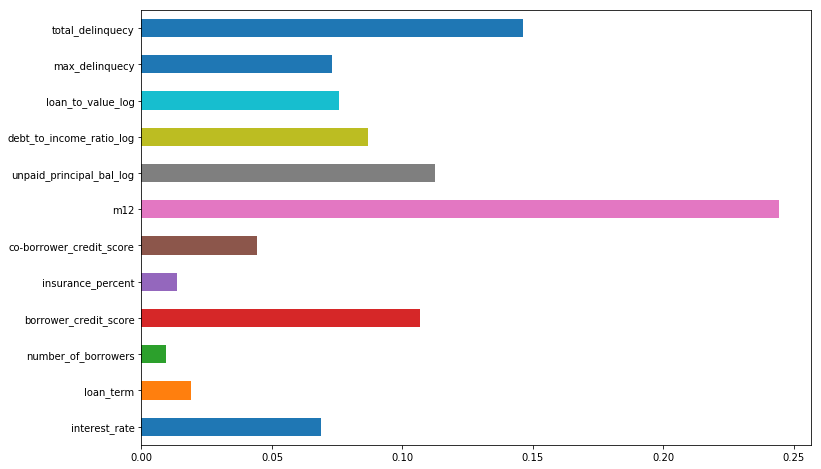

In [109]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

#graph showing the important features for classification, m12 is most important

#applying XGBoost algorithm

In [85]:
from xgboost.sklearn import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]


1 of kfold 10
accuracy_score 0.9961230292065133

2 of kfold 10
accuracy_score 0.9957784095804256

3 of kfold 10
accuracy_score 0.9951749095295537

4 of kfold 10
accuracy_score 0.9955195588488712

5 of kfold 10
accuracy_score 0.9957780458383595

6 of kfold 10
accuracy_score 0.996122695157677

7 of kfold 10
accuracy_score 0.9959500215424386

8 of kfold 10
accuracy_score 0.9957776820336062

9 of kfold 10
accuracy_score 0.996553209823352

10 of kfold 10
accuracy_score 0.9964670400689358


In [174]:
submission=pd.DataFrame()
submission['loan_id']=test_original['loan_id']
submission['m13']=pred_test

In [175]:
pd.DataFrame(submission, columns=['loan_id','m13']).to_csv('solution.csv',index=False)

#Feature Engineering

In [99]:
train['max_delinquecy']=train.loc[:,['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']].apply(max,axis=1)
test['max_delinquecy']=test.loc[:,['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']].apply(max,axis=1)

In [100]:
train['total_delinquecy']=train.loc[:,['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']].apply(sum,axis=1)
test['total_delinquecy']=test.loc[:,['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']].apply(sum,axis=1)

In [101]:
train=train.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11'],axis=1)

In [102]:
test=test.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11'],axis=1)


#Best solution was obtained through Logistic regression 
#final submission

In [110]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)     
    model.fit(xtr, ytr)   
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)   
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]
submission=pd.DataFrame()
submission['loan_id']=test_original['loan_id']
submission['m13']=pred_test
pd.DataFrame(submission, columns=['loan_id','m13']).to_csv('solution.csv',index=False)


1 of kfold 10
accuracy_score 0.9962953390195571

2 of kfold 10
accuracy_score 0.9956060997673818

3 of kfold 10
accuracy_score 0.9956918835085301

4 of kfold 10
accuracy_score 0.9952610718593831

5 of kfold 10
accuracy_score 0.9958642081681889

6 of kfold 10
accuracy_score 0.996122695157677

7 of kfold 10
accuracy_score 0.9958638517880224

8 of kfold 10
accuracy_score 0.9962947005601034

9 of kfold 10
accuracy_score 0.9964670400689358

10 of kfold 10
accuracy_score 0.9960361912968548
